In [1]:
import os

def collect_files(directory, contains):
    res = []
    # Get all files in the directory starting with the prefix
    files = [f for f in os.listdir(directory) if all(contain in f for contain in contains)]

    # Print the list of files
    for file in files:
        res.append(file)

    return sorted(res, key=lambda x : x.split("_")[0])

In [2]:
def get_data(directory, tags):
    files = collect_files(directory, tags)
    time = []
    toks = []
    models = []

    for file in files:
        with open(directory + file, "r") as f:
            for line in f.readlines():
                if line.startswith("Time"):
                    model_name = file.split("_")[0]
                    if model_name == "mlc":
                        model_name = "mlc-llm"
                    if model_name == "trtllm":
                        model_name = "trt-llm"
                    models.append(model_name)
                    time.append(int(line.split(": ")[1]))
                if line.startswith("Response Tokens/s"):
                    toks.append(float(line.split(": ")[1]))

    return time, toks, models

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


def visualize(subtitle, time, toks, models, axes):
    # Response tokens per second for each model (replace with actual data)
    data = {
        'Elapsed Time (s)': time,
        'Response Tokens per Second': toks,
        'Model': models
    }

    # Create a DataFrame
    df = pd.DataFrame(data)

    # Set the Seaborn style
    sns.set_theme(style='whitegrid')

    # Create the line plot
    ax = sns.lineplot(x='Elapsed Time (s)', y='Response Tokens per Second', hue='Model', data=df, marker='o', ax=axes)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

    # Add title and labels
    axes.set_title(subtitle, fontsize=10)
    axes.set_xlabel('Elapsed Time (s)', fontsize=10)
    axes.set_ylabel('Response Tokens per Second', fontsize=10)

/home/paperspace/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/paperspace/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/paperspace/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/paperspace/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

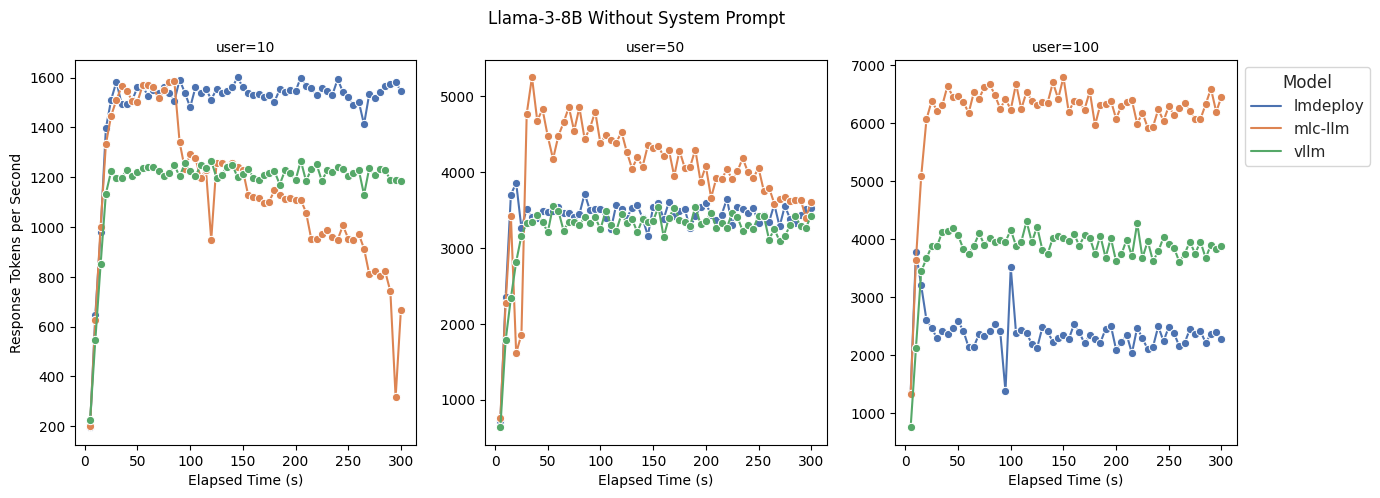

In [4]:
figure, axes = plt.subplots(1, 3, figsize=(15,5))
figure.suptitle("Llama-3-8B Without System Prompt", fontsize=12)

visualize("user=10", *get_data('/home/paperspace/rick/llm-bench/out/', ['8b', 'u10sp0']), axes[0])
visualize("user=50", *get_data('/home/paperspace/rick/llm-bench/out/', ['8b', 'u50sp0']), axes[1])
visualize("user=100", *get_data('/home/paperspace/rick/llm-bench/out/', ['8b', 'u100sp0']), axes[2])

for ax in axes[:-1]:
    ax.legend([],[], frameon=False)

for ax in axes[1:]:
    ax.set_ylabel(None)

plt.show()

/home/paperspace/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/paperspace/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/paperspace/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/paperspace/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

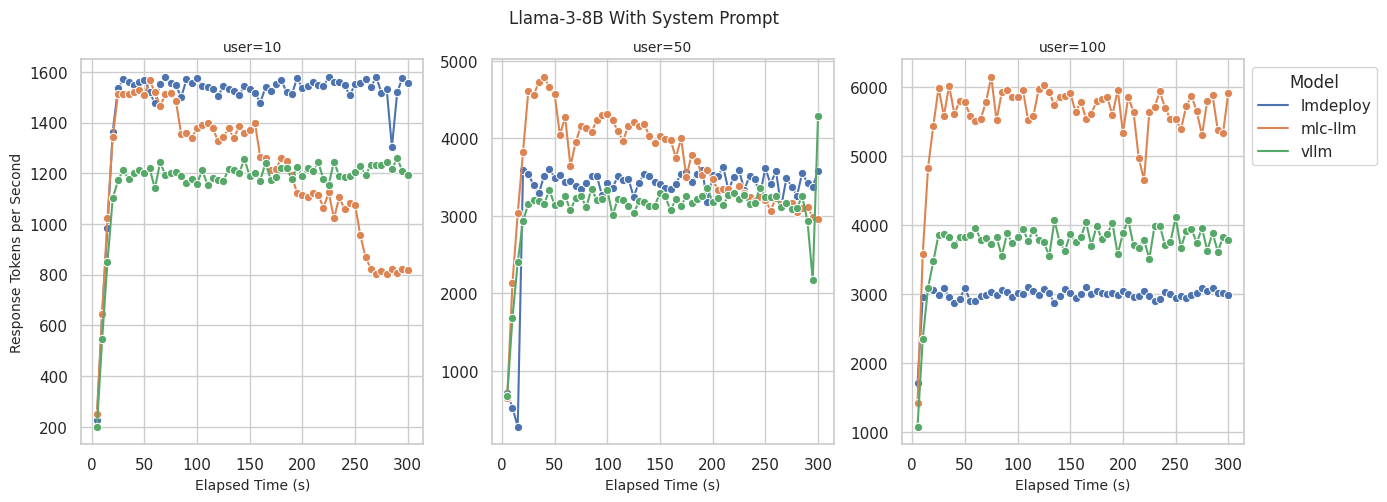

In [5]:
figure, axes = plt.subplots(1, 3, figsize=(15,5))
figure.suptitle("Llama-3-8B With System Prompt", fontsize=12)

visualize("user=10", *get_data('/home/paperspace/rick/llm-bench/out/', ['8b', 'u10sp1']), axes[0])
visualize("user=50", *get_data('/home/paperspace/rick/llm-bench/out/', ['8b', 'u50sp1']), axes[1])
visualize("user=100", *get_data('/home/paperspace/rick/llm-bench/out/', ['8b', 'u100sp1']), axes[2])

for ax in axes[:-1]:
    ax.legend([],[], frameon=False)

for ax in axes[1:]:
    ax.set_ylabel(None)

plt.show()

/home/paperspace/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/paperspace/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/paperspace/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/paperspace/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

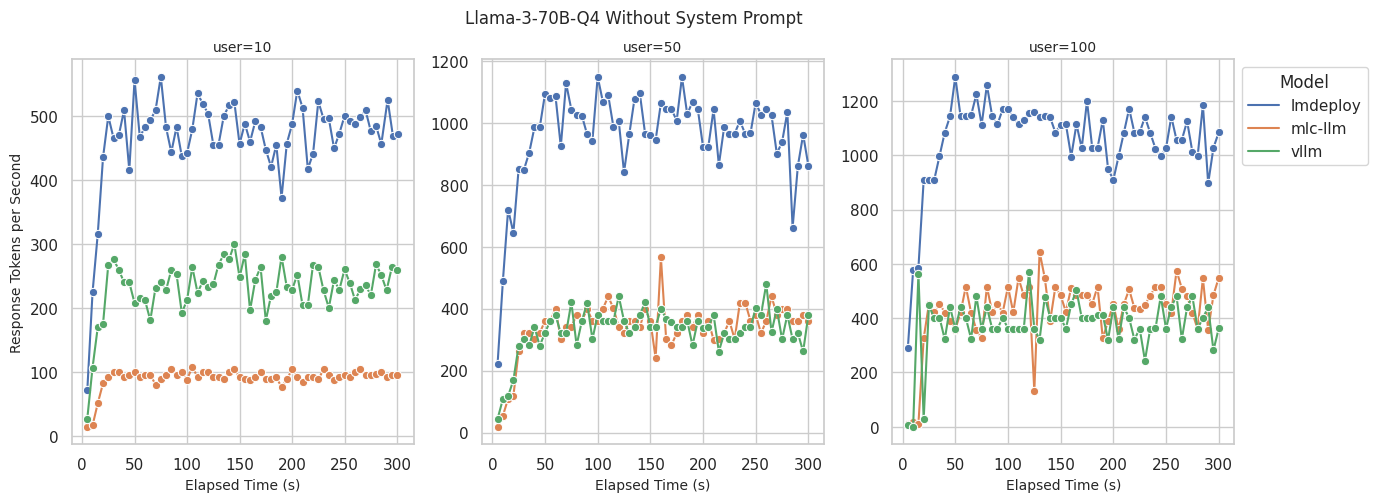

In [6]:
figure, axes = plt.subplots(1, 3, figsize=(15,5))
figure.suptitle("Llama-3-70B-Q4 Without System Prompt", fontsize=12)

visualize("user=10", *get_data('/home/paperspace/rick/llm-bench/out/', ['70b', 'u10sp0']), axes[0])
visualize("user=50", *get_data('/home/paperspace/rick/llm-bench/out/', ['70b', 'u50sp0']), axes[1])
visualize("user=100", *get_data('/home/paperspace/rick/llm-bench/out/', ['70b', 'u100sp0']), axes[2])

for ax in axes[:-1]:
    ax.legend([],[], frameon=False)

for ax in axes[1:]:
    ax.set_ylabel(None)

plt.show()

/home/paperspace/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/paperspace/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/paperspace/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/paperspace/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

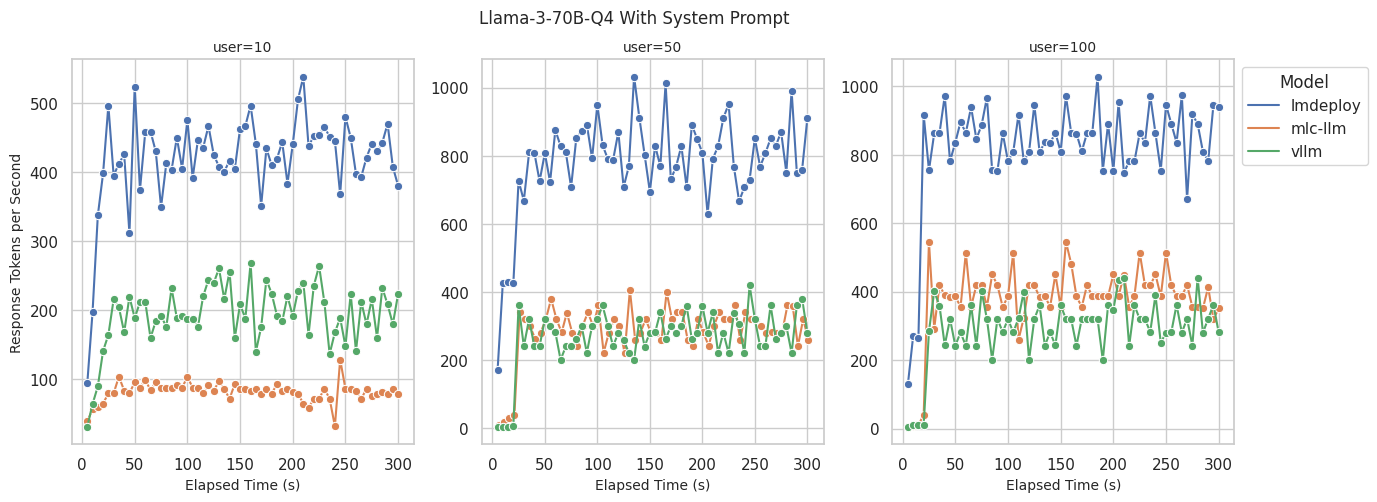

In [7]:
figure, axes = plt.subplots(1, 3, figsize=(15,5))
figure.suptitle("Llama-3-70B-Q4 With System Prompt", fontsize=12)

visualize("user=10", *get_data('/home/paperspace/rick/llm-bench/out/', ['70b', 'u10sp1']), axes[0])
visualize("user=50", *get_data('/home/paperspace/rick/llm-bench/out/', ['70b', 'u50sp1']), axes[1])
visualize("user=100", *get_data('/home/paperspace/rick/llm-bench/out/', ['70b', 'u100sp1']), axes[2])

for ax in axes[:-1]:
    ax.legend([],[], frameon=False)

for ax in axes[1:]:
    ax.set_ylabel(None)

plt.show()